In [1]:
import os 
import json 
import pandas as pd

In [12]:
json_data = open('dataset.json')

In [13]:
json_data = json_data.read()

In [14]:
json_data = json.loads(json_data)

In [15]:
type(json_data)

list

In [16]:
json_data[100]

{'id': 101,
 'name': 'manne6-0100',
 'prompt': 'a photo of a handsome young man wearing an orange shirt, highly detailed, pinterest, protrait photography by Richard Avedon',
 'created_at': '2023-11-16T11:39:14.635Z',
 'updated_at': '2023-11-26T09:22:35.919Z'}

## Creating the dataframe

In [17]:
df = pd.DataFrame(json_data)

In [18]:
df.head()

,id,name,prompt,created_at,updated_at
0,1,manne6-0000,"a mountain seen from far away, a praire in fro...",2023-11-16T11:39:14.321Z,2023-11-17T13:34:11.686Z
1,2,manne6-0001,"a jungle seen from a rural area, sunset, cloud...",2023-11-16T11:39:14.325Z,2023-11-17T13:46:48.516Z
2,3,manne6-0002,"beautiful canadian village in autumn, daylight...",2023-11-16T11:39:14.328Z,2023-11-17T13:48:29.808Z
3,4,manne6-0003,a portrait of a young beautiful woman with lon...,2023-11-16T11:39:14.331Z,2023-11-17T13:51:18.417Z
4,5,manne6-0004,a portrait of a young woman in a beige sweater...,2023-11-16T11:39:14.334Z,2023-11-17T13:53:27.029Z


# Working on images

In [19]:
import cv2 
from matplotlib import pyplot as plt

In [20]:
tiled_images_dir = 'tiled_images'

In [21]:
tiled_images = os.listdir(tiled_images_dir)

## Experimenting with the images

In [29]:
image = cv2.imread(f'tiled_images/{tiled_images[85]}')

In [27]:
image.shape

(2048, 2048, 3)

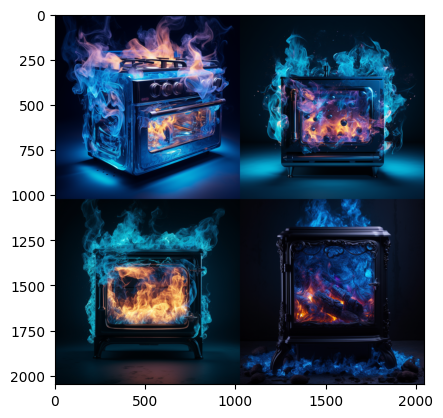

In [30]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Method to split the images

In [31]:
def image_split(input_image): 
    top_left = input_image[0:1024, 0:1024]
    top_right = input_image[0:1024, 1024:2048]
    bottom_left = input_image[1024:2048, 0:1024]
    bottom_right = input_image[1024:2048, 1024:2048]
    
    return top_left, top_right, bottom_left, bottom_right


## Testing the method

In [32]:
images = image_split(image)

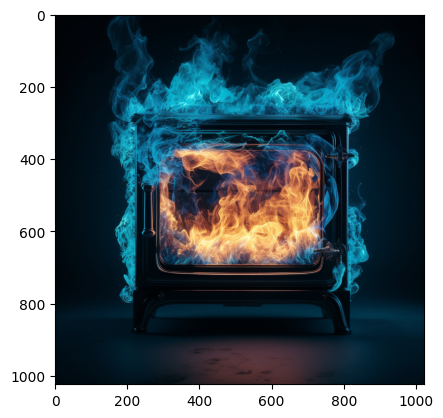

In [35]:
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))

## Mass processing

In [36]:
final_data_dir = 'final_data'

In [46]:
for row in df.iterrows():
    image = cv2.imread(f'{tiled_images_dir}/{row[1]["name"]}.png')
    image = image_split(image)
    for i, img in enumerate(image):
        img = cv2.resize(img, [512, 512])
        prompt_file = open(f'final_data/{row[1]["name"]}-{i}.caption', 'w')
        prompt_file.write(row[1]['prompt'])
        prompt_file.close()
        
        # save the image 
        
        cv2.imwrite(f'final_data/{row[1]["name"]}-{i}.jpg', img)
    print(f'{row[1]["name"]} has been written.')

FileNotFoundError: [Errno 2] No such file or directory: 'final_data/manne6-0000-0.caption'